In [43]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from qutip import *
import matplotlib.gridspec as gridspec
from scipy.integrate import trapezoid


In [44]:
N1 = 4
N2 = 4

In [45]:
class quadrature_operator:
    def __init__(self, n):
        self.n = n

        a = destroy(n)
        adag = a.dag()

        self.x = (a + adag)*1/np.sqrt(2)
        self.p = 1j * (adag - a)*1/np.sqrt(2)

class operator:
    def __init__(self,n, quadrature):
        self.n = n
        self.quadrature = quadrature

        a = destroy(self.n)
        adag = a.dag()

        self.a = a
        self.adag = adag

    def squeezing_operator(self,phi,r):

        self.phi = phi
        self.r = r

        exponent = 0.5 * (r * np.exp(-1j*phi) * self.a**2 - r * np.exp(1j*phi) * self.adag**2)
        return exponent.expm()

    def rotation_operator(self,phi):
        self.phi = phi
        self.rotation_operator = (1j * phi * self.adag * self.a).expm()
        return self.rotation_operator
    
    def displacement_operator_x(self,s):
        self.s = s

        self.displacement_operator = (- 1j * s * self.quadrature.p).expm()
        return self.displacement_operator
    
    def displacement_operator_p(self,t):
        self.t = t

        self.displacement_operator = ( 1j * t * self.quadrature.x).expm()
        return self.displacement_operator

    """def beam_splitter_operator(self, N1, N2, theta):
        self.theta = theta
        self.N1 = N1
        self.N2 = N2

        a1 = destroy(N1)
        adag1 = a1.dag()

        a2 = destroy(N2)
        adag2 = a2.dag()

        I1 = qeye(N1)
        I2 = qeye(N2)

        self.x1 = (a1 + adag1)*1/np.sqrt(2)
        self.p1 = 1j * (adag1 - a1)*1/np.sqrt(2)
        self.x2 = (a2 + adag2)*1/np.sqrt(2)
        self.p2 = 1j * (adag2 - a2)*1/np.sqrt(2)

        exponent = 1j * theta * (tensor(self.p1, I2) - tensor(I1, self.x2))

        return exponent.expm()"""

    def vacuum_state(self):
        vacuum = basis(self.n,0)

        return vacuum

    
class transformation:
    def __init__(self, operator, quadrature):

        self.operator = operator
        self.quadrature = quadrature
        self.transformation = operator.dag() * quadrature * operator 


In [46]:
delta_x = 0.1
delta_p = delta_x

mu = 2

x = np.linspace(-6, 6, 100)
p = np.linspace(-6, 6, 100)

$ \ket{j, \Delta_x, \Delta_p} = \sum_n{ e^{-\frac{1}{2}\cdot \Delta_p^2((2n + j)\sqrt{\pi\hbar})^2}\hat{X}}(2n + j)\sqrt{\pi\hbar}\ket{\Delta_x}$

$\ket{\Delta_x}=\hat{S}(\Delta_x^{-1})\ket{0}$

In [47]:
#vacuum = op.vacuum_state()


#squeezing = op.squeezing_operator(phi = 0, z=1/delta_x)
#displacement = op.displacement_operator_x(s=0, p=p)

## CAT STATES

In [48]:
N = 100
psi = coherent(N,alpha=1) - coherent(N,alpha=-1)

sq = squeeze(N, z = np.log(1.2))

psi_sq = (sq * psi).unit()


In [49]:
W_3 = wigner(psi_sq, x, p)

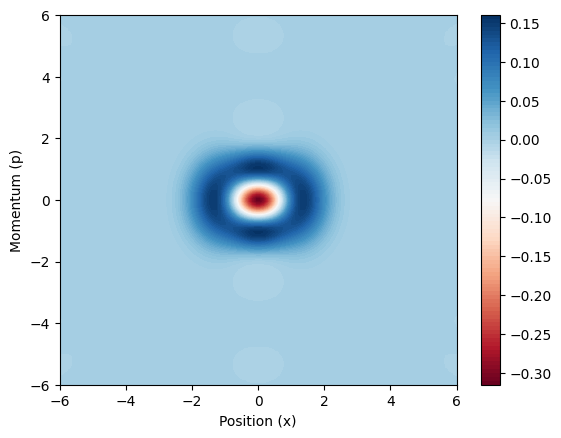

In [50]:
import matplotlib.pyplot as plt
plt.contourf(x, p, W_3, levels=100, cmap='RdBu')
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.colorbar()
plt.show()

## GKP STATES

In [51]:
def GKP_states(N, delta_x, delta_p, j):

    n_max = 20
    n = np.arange(-n_max, n_max+1)

    sq_operator = squeeze(N, z = np.log(1/delta_x))


    vacuum = basis(N,0)

    #first apply squeeze
    psi_0 = sq_operator * vacuum
    psi_1 = 0 * psi_0

    for i in range(len(n)):
        dis_operator = displace(N, alpha = (2*n[i]+j)*np.sqrt(np.pi))
        exponent = -0.5 * delta_p**2 * ( (2*n[i]+j) * np.sqrt(2)) **2
        psi_1 += dis_operator * psi_0 * np.exp(exponent)

    return psi_1.unit()

N=400

In [52]:
gkp_state_0 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 0)
gkp_state_1 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 0)
gkp_state_2 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 0)
gkp_state_3 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 0)

In [53]:
gkp_state_01 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 1)
gkp_state_11 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 1)
gkp_state_21 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 1)
gkp_state_31 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 1)

In [54]:
quad = quadrature_operator(N) 

op = operator(N,quad)            

displacement_x = op.displacement_operator_x(1)
displacement_p = op.displacement_operator_p(1)

rotation = op.rotation_operator(np.pi/4)
#beam_splitter = op.beam_splitter_operator(N1=N, N2=N, theta=np.pi/4)

In [55]:
### BEAMSPLITTER 

#tensor_product = tensor(gkp_state_0, gkp_state_01)
#beam_used = beam_splitter * tensor_product

In [57]:
#Beam_Wigner = wigner(beam_used, x, p)

#plt.contourf(x, p, Beam_Wigner, levels=100, cmap='RdBu')
#plt.colorbar()
#plt.title(r'$|0\rangle_{\rm GKP} = |0\rangle_{\rm GKP} \tensor |1\rangle_{\rm GKP}$')
##plt.xlabel('Position')
#plt.ylabel('Momentum')
#plt.show()

In [58]:
dis_gkp_x = displacement_x * gkp_state_0
dis_gkp_p = displacement_p * gkp_state_0

dis_W_GKP_0_x = wigner(dis_gkp_x, x, p)
dis_W_GKP_0_p = wigner(dis_gkp_p, x, p)

rot_W_GKP_0 = wigner(rotation * gkp_state_0, x, p)


In [59]:
some = op.squeezing_operator(phi=np.pi/2, r=1)
sq_W_GKP_0 = wigner(some * gkp_state_0, x, p)

In [60]:
W_GKP_0 = wigner(gkp_state_0, x, p)
W_GKP_1 = wigner(gkp_state_1, x, p)
W_GKP_2 = wigner(gkp_state_2, x, p)
W_GKP_3 = wigner(gkp_state_3, x, p)

In [61]:
W_GKP_01 = wigner(gkp_state_01, x, p)
W_GKP_11 = wigner(gkp_state_11, x, p)
W_GKP_21 = wigner(gkp_state_21, x, p)
W_GKP_31 = wigner(gkp_state_31, x, p)

In [86]:
plus_gkp = 1/np.sqrt(2) * (gkp_state_0 + gkp_state_01)
W_GKP_plus = wigner(plus_gkp, x, p)
minus_gkp = 1/np.sqrt(2) * (gkp_state_0 - gkp_state_01)
W_GKP_minus = wigner(minus_gkp, x, p)

plus_i_gkp = 1/np.sqrt(2) * (gkp_state_0 + 1j * gkp_state_01)
W_GKP_plus_i = wigner(plus_i_gkp, x, p)
minus_i_gkp = 1/np.sqrt(2) * (gkp_state_0 - 1j * gkp_state_01)
W_GKP_minus_i = wigner(minus_i_gkp, x, p)

In [62]:
vmin = min(W_GKP_0.min(), W_GKP_1.min(), W_GKP_2.min(), W_GKP_3.min(), W_GKP_01.min(), W_GKP_11.min(), W_GKP_21.min(), W_GKP_31.min())
vmax = max(W_GKP_0.max(), W_GKP_1.max(), W_GKP_2.max(), W_GKP_3.max(), W_GKP_01.max(), W_GKP_11.max(), W_GKP_21.max(), W_GKP_31.max())

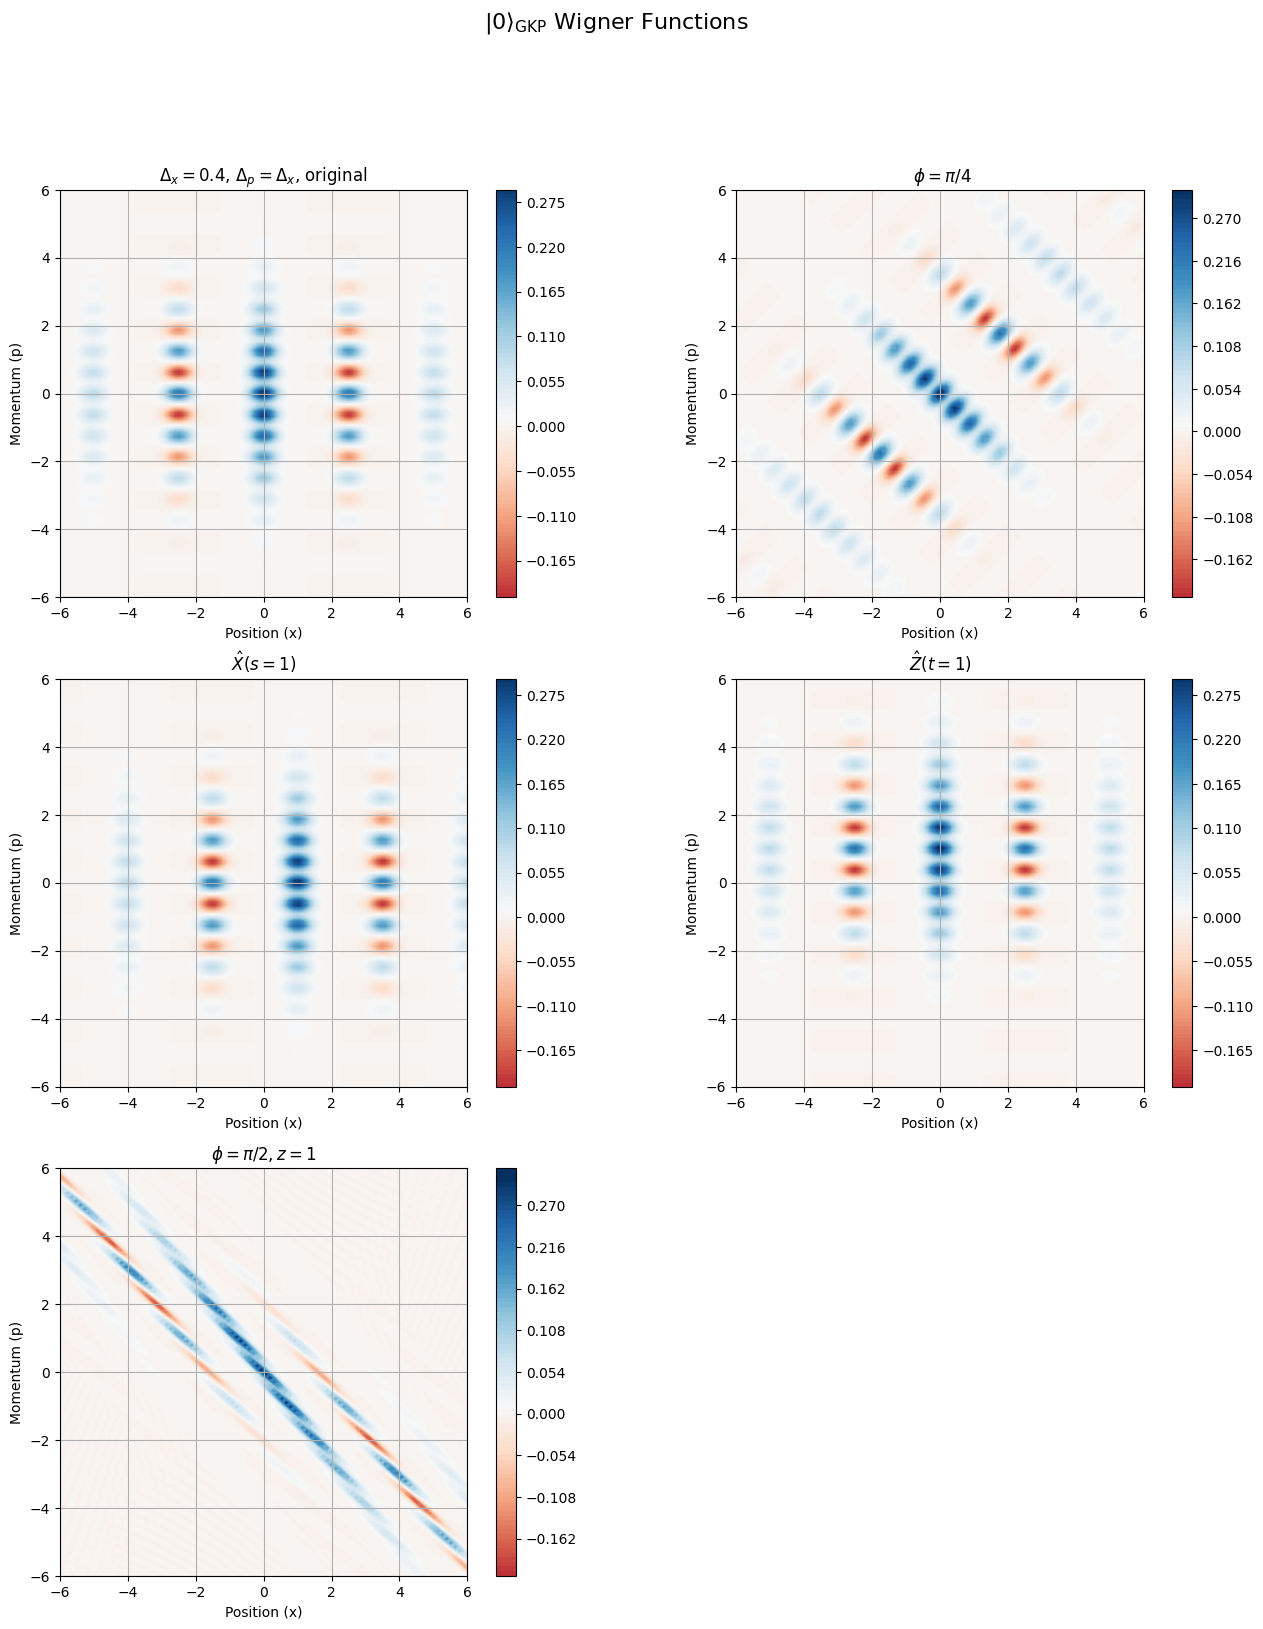

In [63]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0, 0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0, 0].set_xlabel("Position (x)")
axs[0, 0].set_ylabel("Momentum (p)")
axs[0, 0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$, original")
axs[0, 0].set_aspect('equal')
axs[0, 0].grid()
fig.colorbar(cf1, ax=axs[0, 0])

cf2 = axs[1, 0].contourf(x, p, dis_W_GKP_0_x, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1, 0].set_xlabel("Position (x)")
axs[1, 0].set_ylabel("Momentum (p)")
axs[1, 0].set_title(r"$\hat{X}(s=1)$")
axs[1, 0].set_aspect('equal')
axs[1, 0].grid()
fig.colorbar(cf2, ax=axs[1, 0])

cf3 = axs[0,1].contourf(x, p, rot_W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\phi = \pi/4$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf3, ax=axs[0,1])

cf4 = axs[1, 1].contourf(x, p, dis_W_GKP_0_p, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1, 1].set_xlabel("Position (x)")
axs[1, 1].set_ylabel("Momentum (p)")
axs[1, 1].set_title(r"$\hat{Z}(t=1)$")
axs[1, 1].set_aspect('equal')
axs[1, 1].grid()
fig.colorbar(cf2, ax=axs[1, 1])

cf4 = axs[2,0].contourf(x, p, sq_W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[2,0].set_xlabel("Position (x)")
axs[2,0].set_ylabel("Momentum (p)")
axs[2,0].set_title(r"$\phi = \pi/2, z = 1$")
axs[2,0].set_aspect('equal')
axs[2,0].grid()
fig.colorbar(cf4, ax=axs[2,0])

axs[2,1].remove()



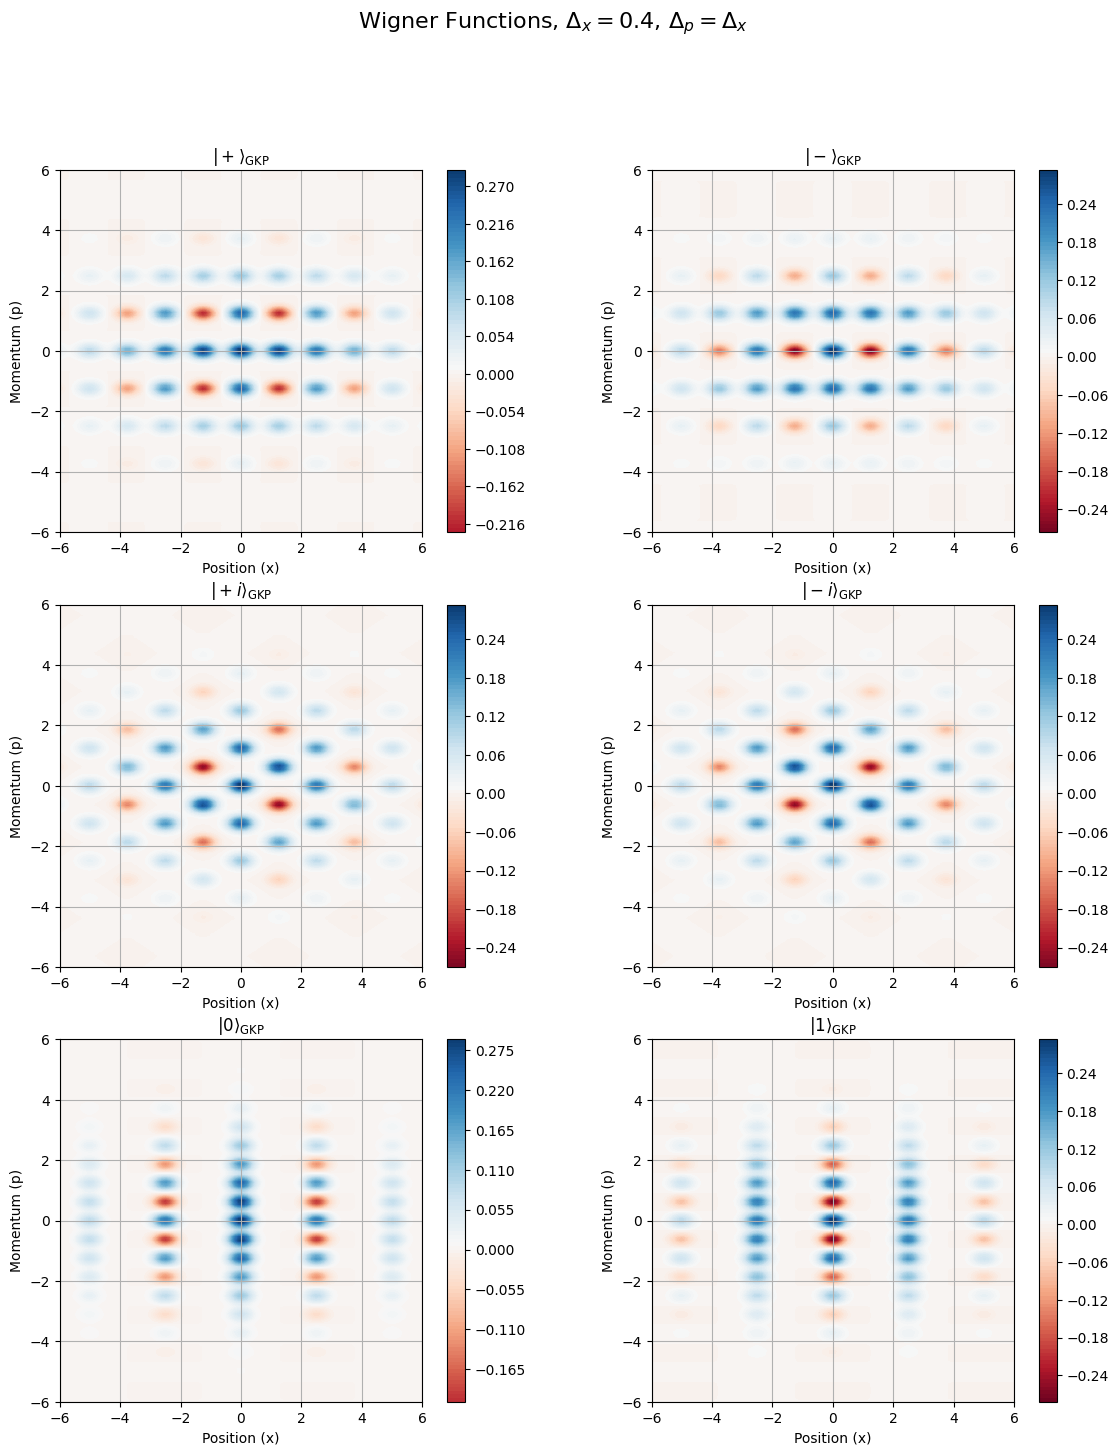

In [91]:
fig, axs = plt.subplots(3, 2, figsize=(14, 16))

plt.suptitle(r"Wigner Functions, $\Delta_x=0.4$, $\Delta_p=\Delta_x$", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_plus, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$|+\rangle_{\rm GKP}$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_minus, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r"$|-\rangle_{\rm GKP}$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_plus_i, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r"$|+i\rangle_{\rm GKP}$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_minus_i, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r"$|-i\rangle_{\rm GKP}$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

cf5 = axs[2,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[2,0].set_xlabel("Position (x)")
axs[2,0].set_ylabel("Momentum (p)")
axs[2,0].set_title(r"$|0\rangle_{\rm GKP}$")
axs[2,0].set_aspect('equal')
axs[2,0].grid()
fig.colorbar(cf5, ax=axs[2,0])

cf6 = axs[2,1].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[2,1].set_xlabel("Position (x)")
axs[2,1].set_ylabel("Momentum (p)")
axs[2,1].set_title(r"$|1\rangle_{\rm GKP}$")
axs[2,1].set_aspect('equal')
axs[2,1].grid()
fig.colorbar(cf6, ax=axs[2,1])

plt.show()


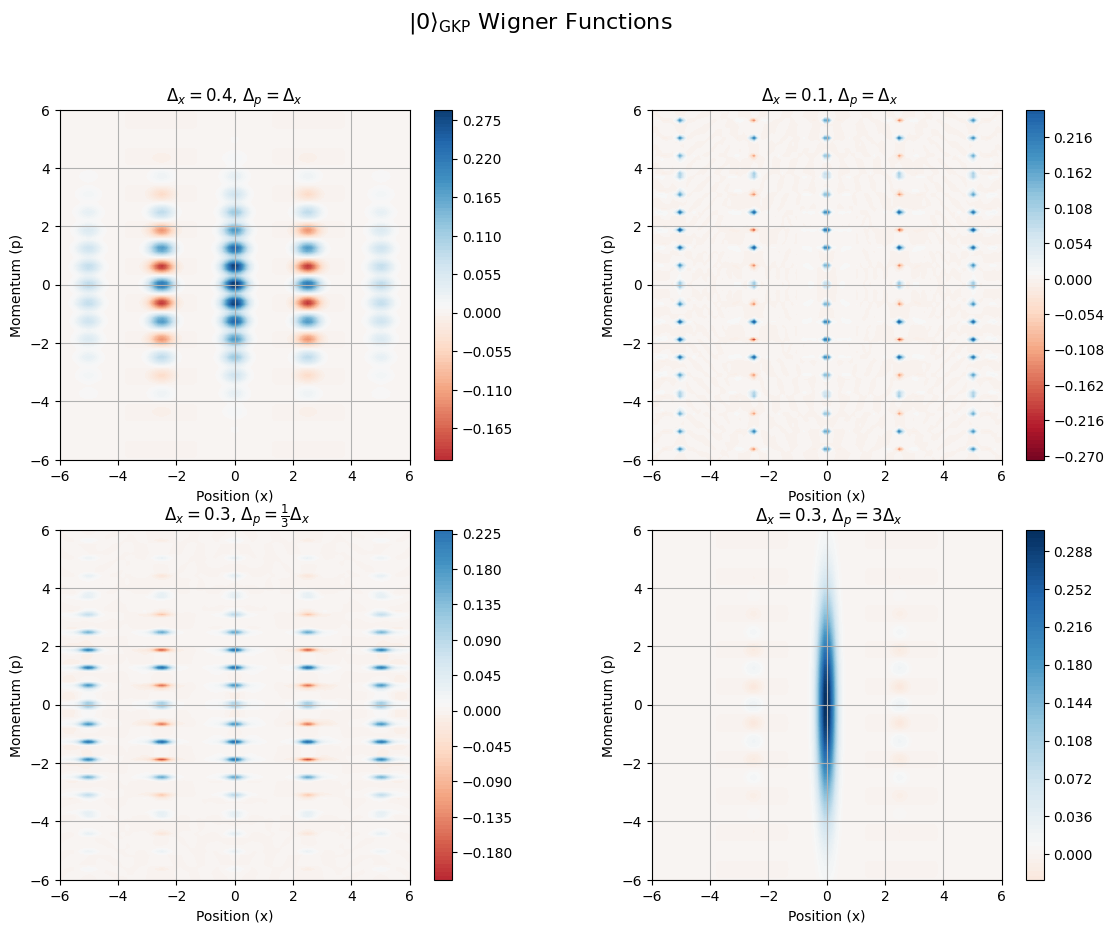

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_1, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_2, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_3, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


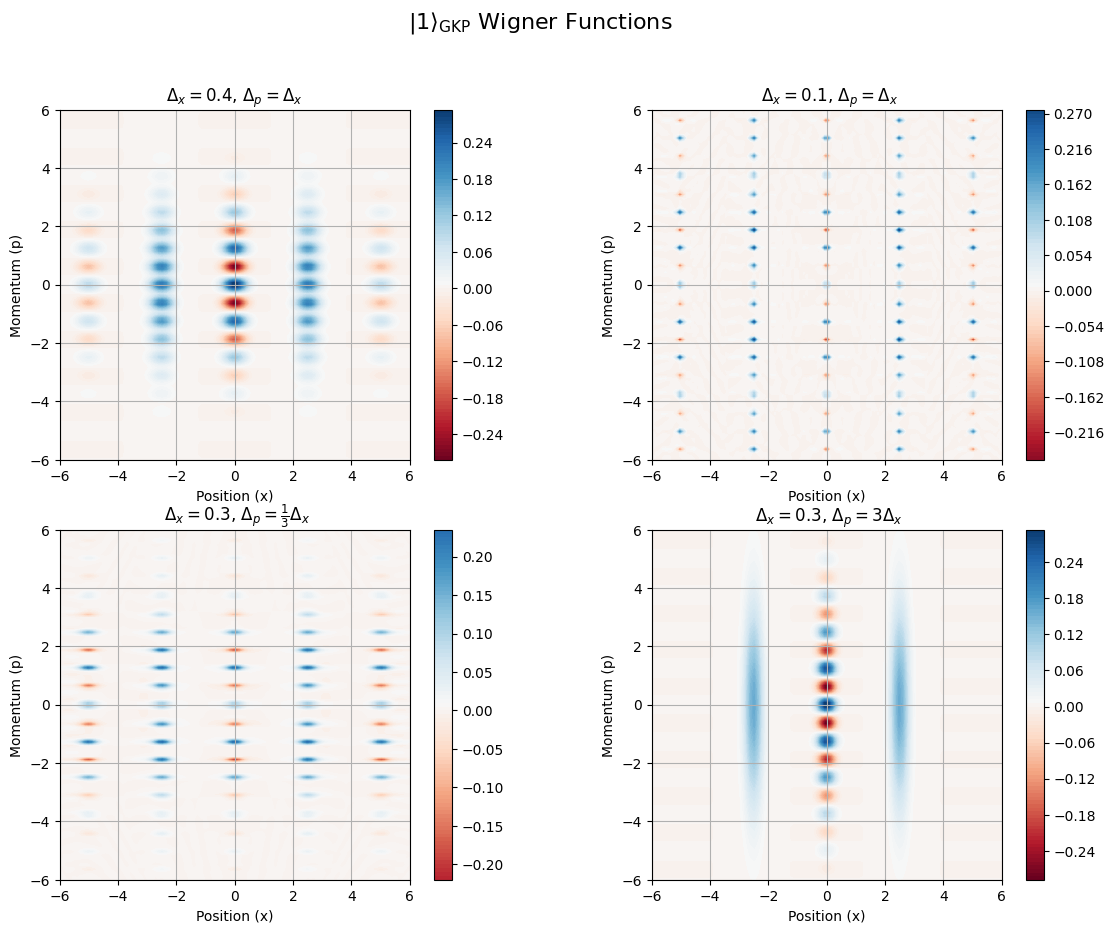

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|1\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_11, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_21, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_31, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


In [96]:
Px_0 = trapezoid(W_GKP_0, p, axis=0)  
Pp_0 = trapezoid(W_GKP_0, x, axis=1)
#plt.plot(x, W_GKP_0[len(x)//2,:])

Px_01 = trapezoid(W_GKP_01, p, axis=0)
Pp_01 = trapezoid(W_GKP_01, x, axis=1)

Px_1 = trapezoid(W_GKP_1, p, axis=0)
Pp_1 = trapezoid(W_GKP_1, x, axis=1)


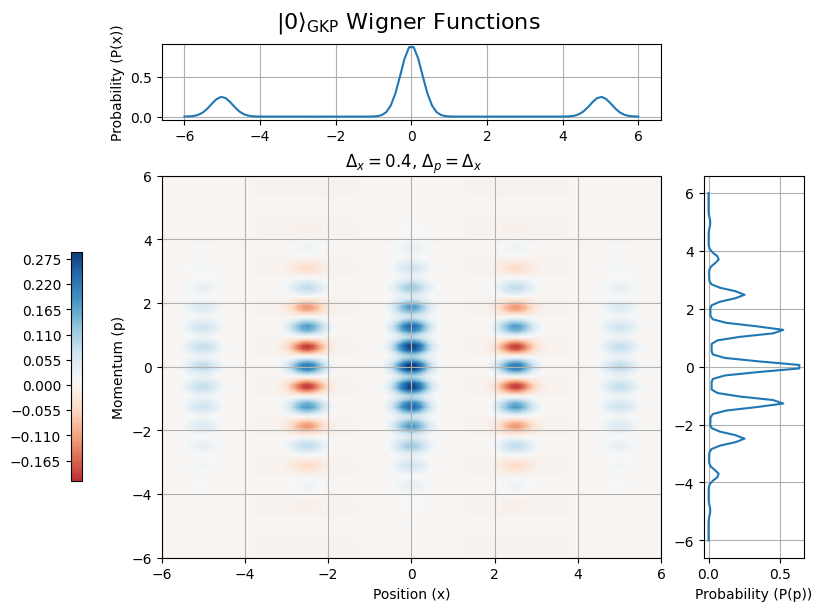

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_0)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_0,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


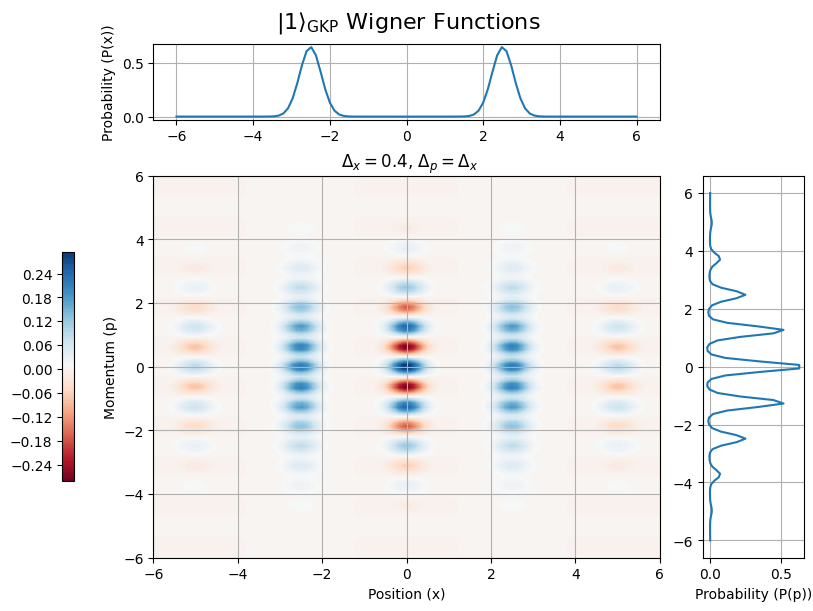

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|1\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_01)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_01,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


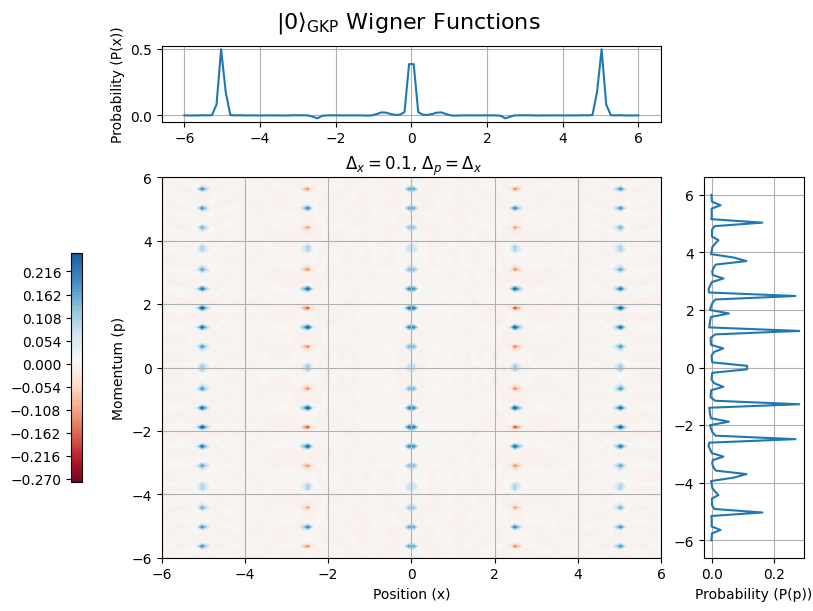

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_1)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_1, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_1,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


In [70]:
from qutip import fock_dm

Fock state distribution, $| n \rangle$

$|\Psi\rangle = \sum_{n=0}^{\infty} c_n | n \rangle$

$P_n = |\langle n | \Psi \rangle |^2$

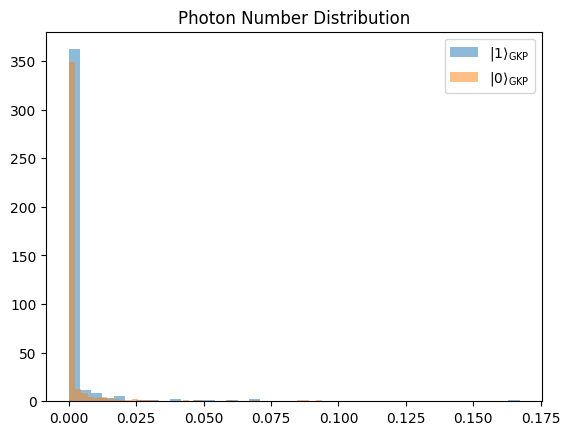

In [84]:
dim = N

P_n_0 = [expect(fock_dm(dim, n), gkp_state_2) for n in range(dim)]
P_n_1 = [expect(fock_dm(dim, n), gkp_state_21) for n in range(dim)]


plt.hist(P_n_1, bins=40, alpha=0.5, label=r'$|1\rangle_{\rm GKP}$')
plt.hist(P_n_0, bins=40, alpha=0.5, label=r'$|0\rangle_{\rm GKP}$')
plt.title("Photon Number Distribution")
plt.legend()
plt.show()
